# Outlier Detection 

#### Outliers:

An outlier is an observation that appears to deviate markedly from other observations in the sample.
Identification of potential outliers is important for the following reasons.

- An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly. If it can be determined that an outlying point is in fact erroneous, then the outlying value should be deleted from the analysis (or corrected if possible).
- In some cases, it may not be possible to determine if an outlying point is bad data. Outliers may be due to random variation or may indicate something scientifically interesting. In any event, we typically do not want to simply delete the outlying observation. However, if the data contains significant outliers, we may need to consider the use of robust statistical techniques.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

Let us use titanic and tips preloaded datasets for this example.

In [2]:
titanic = sns.load_dataset('titanic')

tips = sns.load_dataset('tips')

In [3]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

One way to detect outliers is by plotting them on a graph. Though this is a bit crude way it offers valuable insights of our data distribution.

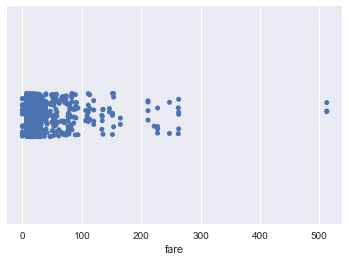

In [15]:
sns.stripplot(titanic.fare , jitter = True)

We can understand from the strip polt we plotted that there are some data points which are outliers located in the far right of the graph.

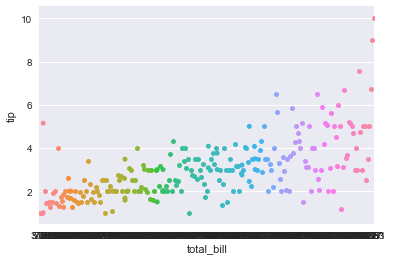

In [10]:
sns.stripplot(x = tips.total_bill,y = tips.tip)

In the above plot we are trying to find a relation between total bill and tips given. Here we find a point in the far left situated between 4 and 6. It is unlikely that a person making such a small total bill would donate that large tip. So it is safe to assume that it is a outlier.

The above plots doesn't offer you any reasonable insights they might only to give a rough idea of distribution of points.

You can manually eliminate those outliers but there are also few scientific ways to eliminate them.

### Using Boxplot for outlier detection.

The box plot is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. Any point that is falling beyond the specified five quartiles it is be classified as a outlier.

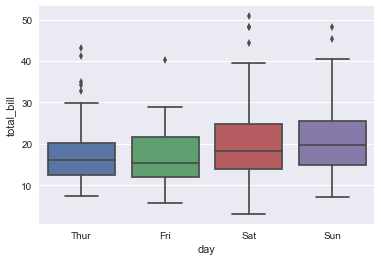

In [17]:
sns.boxplot(x = tips.day, y = tips.total_bill)

So this is giving you a more scientific understanding about the mean and outliers in the data.

### Removing outliers using standard deviation.

Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean.

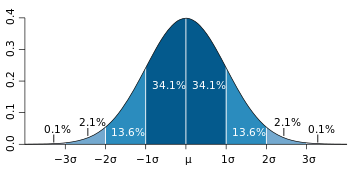

In [16]:
from IPython.display import Image
Image('http://www.statisticshowto.com/wp-content/uploads/2012/11/Standard_deviation_diagram.svg_.png')

When we perform analytics, we often come across data that follow a pattern with values rallying around a mean and having almost equal results below and above it.It is called as normal distribution. About 68% of values drawn from a normal distribution are within one standard deviation σ away from the mean, about 95% of the values lie within two standard deviations, and about 99.7% are within three standard deviations.

This fact is known as the 68-95-99.7 (empirical) rule, or the 3-sigma rule.

We needed to remove these outlier values because they were making the scales on our graph unrealistic. The challenge was that the number of these outlier values was never fixed. Sometimes we would get all valid values and sometimes these erroneous readings would cover as much as 10% of the data points.

Our approach was to remove the outlier points by eliminating any points that were above (Mean + 2*SD) and any points below (Mean - 2*SD) before plotting the frequencies. You can tweak it a liitle bit to obtain better elimation of outlier detection.